# Henon-Heiles & Lorenz (short notes)

## Henon-Heiles

Origin: Toda lattice

$$H(p_i,\varphi_i)=\frac{1}{2}(p_1^2+p_2^2+p_3^2)+e^{\varphi_3-\varphi_1}+e^{\varphi_1-\varphi_2}+e^{\varphi_2-\varphi_3}$$

<div>
<img src="images/Toda_scheme.png" width="400">
</div>

new momentums $P_1=p_1,\,\,P_2=p_2,\,\,P_3 = p_1+p_2+p_3$. New hamiltonian:

$$H(P_i,\varPhi_i) = \frac{1}{2}[P_1^2+P_2^2+(P_3-P_1-P_2)^2]+e^{-\varPhi_1} + e^{\varPhi_1-\varPhi_2}+e^{\varPhi_2}-3$$

After another canonical transformation with а certain generating function, we can get

$$H(p_x,p_y,x,y)=\frac{1}{2}(p_x^2+p_y^2)+\frac{1}{24}[e^{2y+2\sqrt{3}x}+e^{2y-2\sqrt{3}x}+e^{-4y}]-\frac{1}{8}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
import matplotlib
import warnings

from flows import *

warnings.filterwarnings('ignore')
# %matplotlib notebook

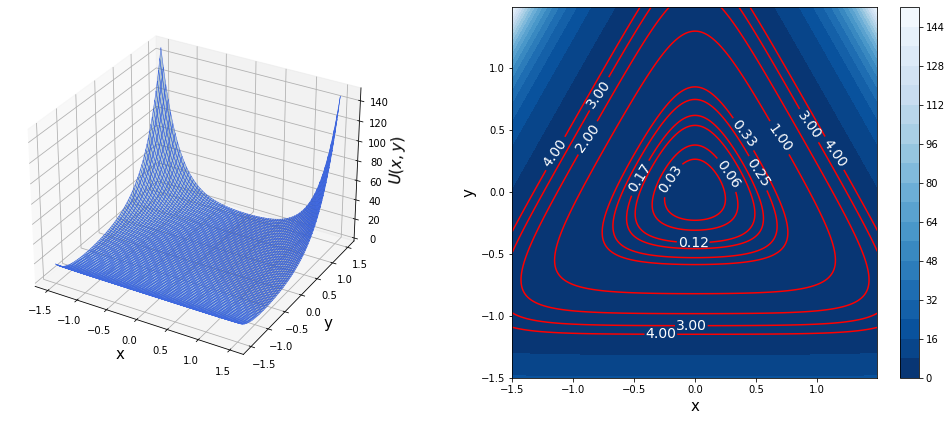

In [39]:
fig  = plt.figure(figsize=(18,15))
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2)

X, Y = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005]
Z = Toda_U(X,Y)

ax1.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
ax1.set_xlabel('x',fontsize=15)
ax1.set_ylabel('y',fontsize=15)
ax1.set_zlabel('$U(x,y)$',fontsize=15)

levels = [1/32, 1/16, 1/8, 1/6, 1/4, 1/3, 1, 2, 3, 4]

CS = ax2.contourf(X, Y, Z, 20, cmap=plt.cm.Blues_r)
CS2 = ax2.contour(CS, levels=levels, colors='r')
ax2.clabel(CS2, fmt='%3.2f', colors='w', fontsize=14)
ax2.set_xlabel('x',fontsize=15)
ax2.set_ylabel('y',fontsize=15)

cbar = fig.colorbar(CS)
plt.show()

Potential:
$$U(x,y)=\frac{1}{2}(x^2+y^2)+x^2y-\frac{1}{3}y^3$$

Hamiltonian:
$$H(p_x,p_y,x,y)=\frac{1}{2}(p_x^2+p_y^2)+\frac{1}{2}(x^2+y^2)+x^2y-\frac{1}{3}y^3$$

Canonical equations: 

$$\{q_i,H\}=\dot{q}_i,\,\, \{p_i,H\}=\dot{p}_i \quad\Rightarrow$$

\begin{equation}
\begin{cases}
\dot{x}&=&p_x,\\
\dot{p}_x &=& -x-2xy,\\
\dot{y} &=& p_y,\\
\dot{p}_y&=&-y-x^2-y^2.
\end{cases}
\end{equation}

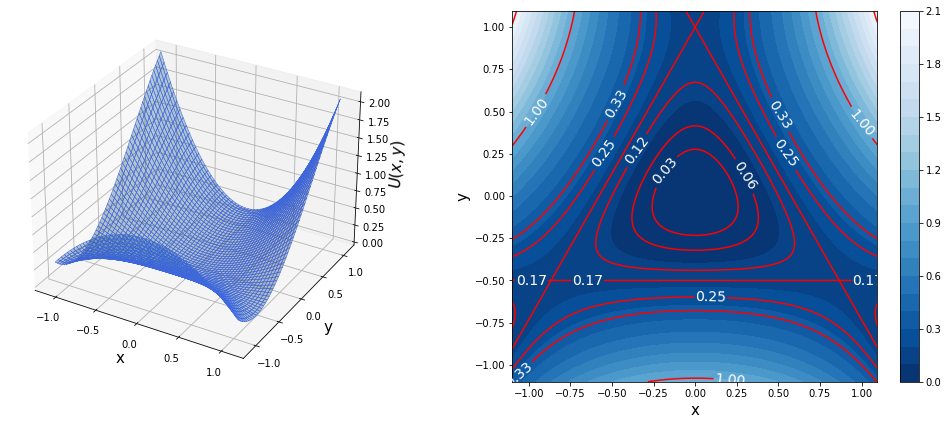

In [40]:
fig  = plt.figure(figsize=(18,15))
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2)

X, Y = np.mgrid[-1.1:1.1:0.005, -1.1:1.1:0.005]
Z = HH_U(X,Y)

ax1.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
ax1.set_xlabel('x',fontsize=15)
ax1.set_ylabel('y',fontsize=15)
ax1.set_zlabel('$U(x,y)$',fontsize=15)

levels = [1/32, 1/16, 1/8, 1/6, 1/4, 1/3, 1, 2, 3, 4]

CS = ax2.contourf(X, Y, Z, 20, cmap=plt.cm.Blues_r)
CS2 = ax2.contour(CS, levels=levels, colors='r')
ax2.clabel(CS2, fmt='%3.2f', colors='w', fontsize=14)
ax2.set_xlabel('x',fontsize=15)
ax2.set_ylabel('y',fontsize=15)

cbar = fig.colorbar(CS)
plt.show()

In [6]:
n = 10
x_0 = np.linspace(-0.4,0.4,n)
y_0 = np.linspace(-0.4,0.4,n)
p_x_0 = np.linspace(-1,1,n)
E_2 = 0.16668765
E_1 = 0.113
E_0 = 0.05


init_group_0 = Init_conds(x_0,y_0,p_x_0,E_0);
Solution_0 = Sol(init_group_0);
y_sec_0, py_sec_0 = Poincare_section_y_py(Solution_0)

init_group_1 = Init_conds(x_0,y_0,p_x_0,E_1);
Solution_1 = Sol(init_group_1);
y_sec_1, py_sec_1 = Poincare_section_y_py(Solution_1)

init_group_2 = Init_conds(x_0,y_0,p_x_0,E_2);
Solution_2 = Sol(init_group_2);
y_sec_2, py_sec_2 = Poincare_section_y_py(Solution_2)

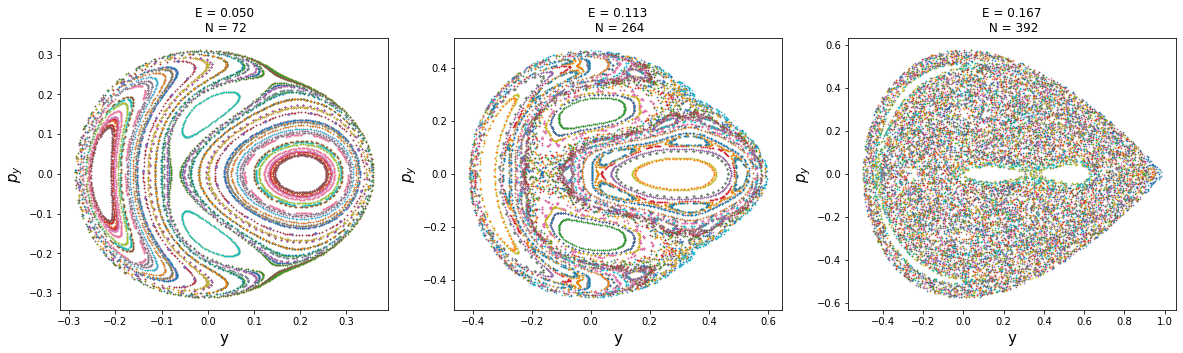

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (20,5))

for ax in axes.ravel():  
    ax.set_xlabel('y',fontsize=15)
    ax.set_ylabel('$p_{y}$',fontsize=15)
axes[0].set_title(f'E = {E_0:.3f}\n N = {len(init_group_0)}')
axes[1].set_title(f'E = {E_1:.3f}\n N = {len(init_group_1)}')
axes[2].set_title(f'E = {E_2:.3f}\n N = {len(init_group_2)}')

for i in range(len(y_sec_0)):
    axes[0].scatter(y_sec_0[i],py_sec_0[i],marker = '.',s=1.5)
    axes[1].scatter(y_sec_1[i],py_sec_1[i],marker = '.',s=1.5)
    axes[2].scatter(y_sec_2[i],py_sec_2[i],marker = '.',s=1.5)
    


In [ ]:
def phase_plot(init):
    
    fig  = plt.figure(figsize=(18,13))
    ax = fig.add_subplot(1,1,1, projection='3d')


    ax.set_xlabel('x',fontsize=15)
    ax.set_ylabel('y',fontsize=15)
    ax.set_zlabel('$p_y$',fontsize=15)
    
    
    y_sec, z_sec = np.meshgrid(np.linspace(-0.4,0.4), np.linspace(-0.3,1))
    x_sec = y_sec*0
    

0.2783882181415011


Text(0.5, 0, '$p_y$')

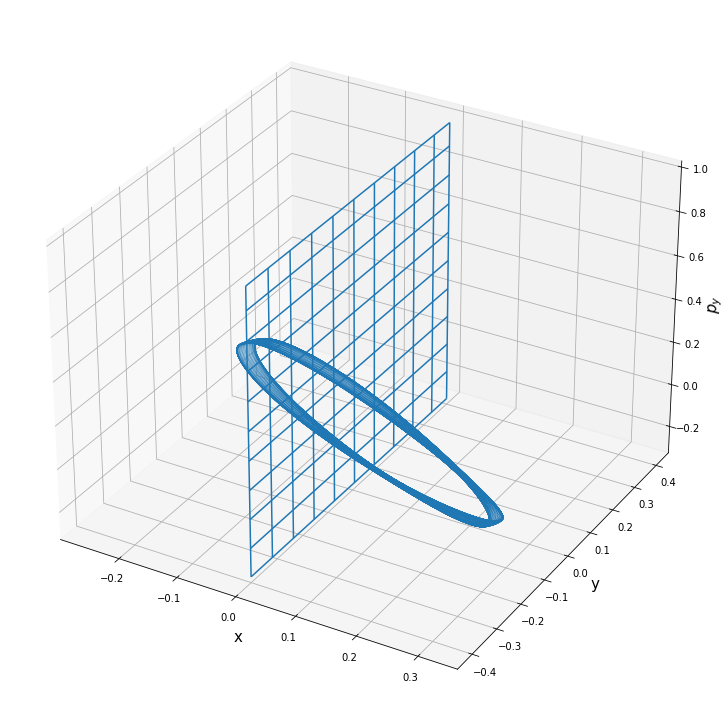

In [11]:
%matplotlib inline
x_0 = 0
y_0 = 0.
p_y_0 = -0.15
E = 0.05
p_x_0 = np.sqrt(2 * (E - HH_U(x_0,y_0)) - p_y_0 ** 2)
print(p_x_0)
init_cond = np.array([[x_0,y_0,p_x_0,p_y_0]])
Solution = Sol(init_cond)[0]

yy, zz = np.meshgrid(np.linspace(-0.4,0.4), np.linspace(-0.3,1))
xx = yy*0



fig  = plt.figure(figsize=(18,13))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot(Solution[:,0],Solution[:,1],Solution[:,-1],linewidth=0.1)
ax.plot_wireframe(xx, yy, zz, rstride=5, cstride=5)



ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.set_zlabel('$p_y$',fontsize=15)


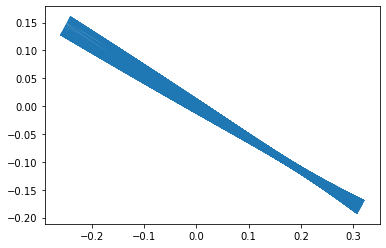

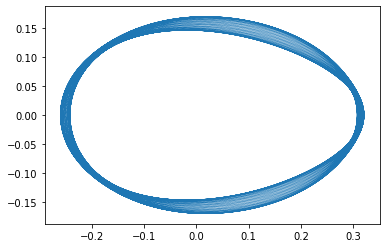

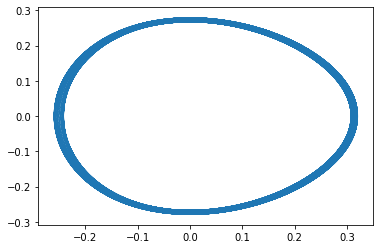

In [12]:
plt.plot(Solution[:,0],Solution[:,1],linewidth=0.1)
plt.show()
plt.plot(Solution[:,0],Solution[:,-1],linewidth=0.1)
plt.show()
plt.plot(Solution[:,0],Solution[:,2],linewidth=0.1)


In [14]:
y_sec_2, py_sec_2 = Poincare_section_y_py(Solution[None])

(-0.6, 0.6)

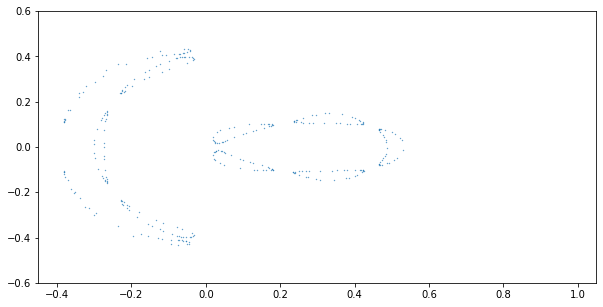

In [15]:
fig, ax = plt.subplots(1,1, figsize = (10,5))


ax.scatter(y_sec_2,py_sec_2, s=0.1)
ax.set_xlim([-0.45, 1.05])
ax.set_ylim([-0.6, 0.6])

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**512
plt.rcParams['animation.ffmpeg_path'] = r'C:\FFmpeg\bin\ffmpeg.exe'

Writer = animation.writers['ffmpeg']
writer_1 = Writer(fps=10, bitrate=-1)
writer_2 = Writer(fps=15, bitrate=-1)


fig, ax = plt.subplots(1,1, figsize = (10,8))

scat = ax.scatter([], [], s=1)
title = ax.text(0.4,1., "", fontsize=14,transform=ax.transAxes)
ax.set(xlim=[-0.8,0.8], ylim=[-0.8,0.8], xlabel='$y$', ylabel='$p_y$')


E_s = np.linspace(0.02,0.1666,100)
n = 10
x_0 = np.linspace(-0.4,0.4,n)
y_0 = np.linspace(-0.4,0.4,n)
p_x_0 = np.linspace(-1,1,n)

def update(i):
    print(i,end='\r')
    init_group = Init_conds(x_0,y_0,p_x_0,E_s[i]);
    Solution = Sol(init_group);
    y_sec, py_sec = Poincare_section_y_py(Solution);
    y_sec = [item for sublist in y_sec for item in sublist]
    py_sec = [item for sublist in py_sec for item in sublist]
    y_sec = np.asarray(y_sec)
    py_sec = np.asarray(py_sec)
    
    moment = np.stack([y_sec, py_sec]).T
    scat.set_offsets(moment)
    lab = f'K = {E_s[i]}'
    title.set_text(f'E = {E_s[i]:.4f}')
    ax.set(xlim=[min(y_sec)-0.05,max(y_sec)+0.05], ylim=[min(py_sec)-0.05,max(py_sec)+0.05])
    
    return scat, title


anim = animation.FuncAnimation(fig=fig, func=update, frames=len(E_s), interval=80)
anim.save('./animations/Henon-Heiles_poincare_map_10.mp4', dpi=200, writer=writer_1)
anim.save('./animations/Henon-Heiles_poincare_map_15.mp4', dpi=200, writer=writer_2)

anim

$$I=8p_x(p_x^2-3p_y^2)+(p_x+\sqrt{3}p_y)e^{2y-2\sqrt{3}x}+(p_x-\sqrt{3}p_y)e^{2y-2\sqrt{3}x}+2p_xe^{-4y}$$

## Lorenz system

\begin{equation}
\begin{cases}
\frac{\partial\vec{v}}{\partial t}+(\vec{v}\nabla)\vec{v}=-\frac{\nabla p}{\rho}+\mu \nabla^2\vec{v} + \vec{g},\\
\frac{\partial\rho}{\partial t}+\nabla\cdot (\rho\vec{v})=0,\\
\frac{\partial T}{\partial t}+\nabla\cdot (T\vec{v})=\chi\nabla^2 T,\\
\rho = \rho_0 (1-\gamma(T-T_0))
\end{cases}
\end{equation}

Boussinesq approximation leads to Lorenz system:
\begin{equation}
\begin{cases}
\dot{X} &=& \sigma(Y-X) \\
\dot{Y} &=& rX-Y-XZ \\
\dot{Z} &=& XY-bZ
\end{cases}
\end{equation}

$$\text{div} {\vec{f}}=-(b+\sigma+1)<0$$

In [15]:
tmax, n = 100, 50000
s, b, r = 10, 8/3, 29
x0,y0,z0 =20, 20, 100

t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(s, b, r))
x, y, z = f.T

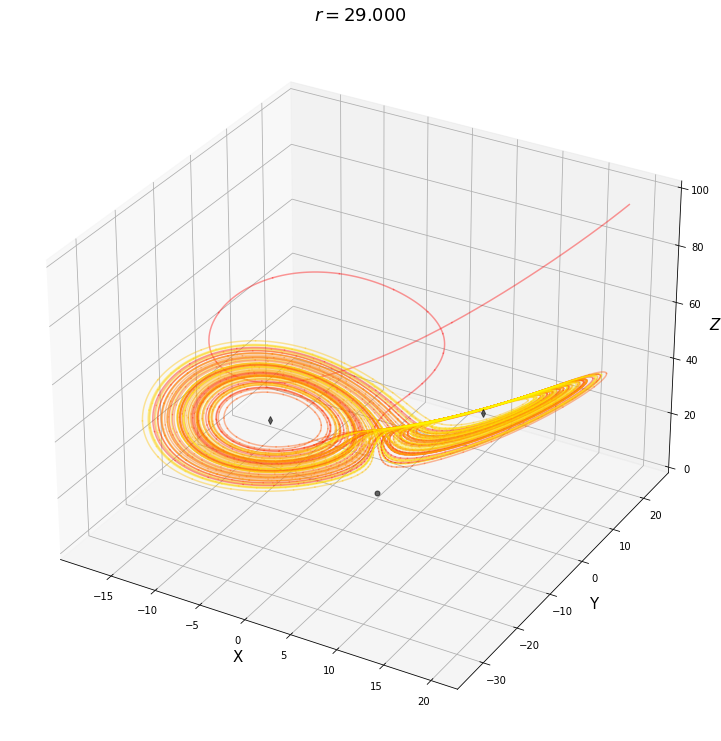

In [17]:
fig  = plt.figure(figsize=(15,13))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.set_xlabel('X',fontsize=15)
ax.set_ylabel('Y',fontsize=15)
ax.set_zlabel('$Z$',fontsize=15)
ax.set_title(f"$r={r:.3f}$", fontsize = 18)
s = 15
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)
    
ax.plot([0.], [0.], [0.], markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
ax.plot([(b*(r-1))**(1/2)], [(b*(r-1))**(1/2)], [r-1], markerfacecolor='k', markeredgecolor='k', marker='d', markersize=5, alpha=0.6)
ax.plot([-(b*(r-1))**(1/2)], [-(b*(r-1))**(1/2)], [r-1], markerfacecolor='k', markeredgecolor='k', marker='d', markersize=5, alpha=0.6)
# ax.view_init(azim=35, elev=20)
